In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline
from actfunc import *
from layer import *
from errorfunc import *
from mnist.load_mnist import mnist
from etcfunc import *

In [2]:
mnist = mnist()

In [5]:
class network():
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size).reshape((1, -1))
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size).reshape((1, -1))
        
    def forward(self, X):
        a1 = X @ self.params["W1"] + self.params["b1"]
        z1 = sigmoid(a1)
        a2 = z1 @ self.params["W2"] + self.params["b2"]
        return softmax(a2)
    
    def loss(self, X, y):
        y_fit = self.forward(X)
        return cross_entropy_error(y_fit, y)
    
    def gradient(self, X, t):
        loss_W = lambda W: self.loss(X, t)
        
        grads = {}
        grads["W1"] = numerial_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerial_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerial_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerial_gradient(loss_W, self.params["b2"])
        
        return grads
    
    def accurary(self, X, t):
        y = self.forward(X)
        y = y.argmax(axis=1)
        t = t.argmax(axis=1)
        
        return np.sum(y == t) / float(X.shape[0])

In [6]:
network = network(784, 100, 10)
loss = []

In [ ]:
learning_rate = 0.01
for i in range(200):
    X, y = get_batch(mnist.train_images, mnist.train_labels, batchsize=8)
    grads = network.gradient(X, y)
    for key in ["W1", "b1", "W2", "b2"]:
        network.params[key] -= learning_rate * grads[key]
        
    loss_tmp = network.loss(X, y[-1, np.newaxis])
    print("{}: {}".format(i, loss_tmp))
    loss.append(loss_tmp)

0: 0.4396431298959381
1: 0.4442638860455993
2: 0.4420585464894538
3: 0.44017967516703493
4: 0.4405075661439457
5: 0.43525693000187327
6: 0.43923375048943536
7: 0.44577710931696474
8: 0.433003670706252
9: 0.437342496726895
10: 0.43763635454062
11: 0.43969832054684216
12: 0.43399011483585015
13: 0.4424403190867663
14: 0.43393185566566156
15: 0.4401008982731852
16: 0.43738325500266473
17: 0.4381589850081909
18: 0.43442763184913835
19: 0.4364183919588786
20: 0.4416358354154002
21: 0.4385331322892417
22: 0.43589791605447115
23: 0.43626696642627555
24: 0.44055644599440724
25: 0.4333025772578886
26: 0.4318364692295934
27: 0.4387352968841462
28: 0.44209838700872306
29: 0.4395511896100384
30: 0.43677053695108337
31: 0.4362055050101558
32: 0.4364872981065256
33: 0.4367630797552967
34: 0.4416225033515165
35: 0.4372407587394326


accuracy: 0.4495


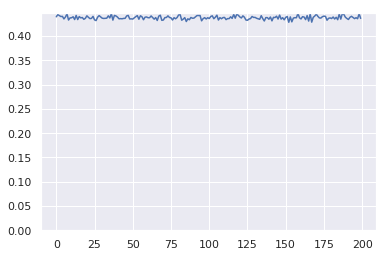

In [10]:
print("accuracy:", network.accurary(mnist.test_images, mnist.test_labels))
plt.plot(loss)
plt.ylim((0, None));

In [29]:
class momentum_optimizer():
    def __init__(self, learning_rate=0.1, beta=0.9):
        self.learning_rate = learning_rate
        self.beta = beta
        self.v = None
        
    def minimize(self, func, W, i):
        if self.v is None:
            self.v = np.zeros_like(W)
        grads = numerial_gradient(func, W)
        self.v = (1 / (1 - self.beta ** (i + 1))) * ((1 - self.beta) * grads + self.beta * self.v)
        W -= self.learning_rate * self.v